Siraphop Mukdphetcharat 64011614

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from six import StringIO
from IPython.display import Image
import pydotplus
import numpy as np

## EDA

In [2]:
# load data
df = pd.read_csv("bank.csv")
print(df)

          id  age     sex      region    income married  children  car  \
0    ID12101   48  FEMALE  INNER_CITY  17546.00      NO         1   NO   
1    ID12102   40    MALE        TOWN  30085.10     YES         3  YES   
2    ID12103   51  FEMALE  INNER_CITY  16575.40     YES         0  YES   
3    ID12104   23  FEMALE        TOWN  20375.40     YES         3   NO   
4    ID12105   57  FEMALE       RURAL  50576.30     YES         0   NO   
..       ...  ...     ...         ...       ...     ...       ...  ...   
595  ID12696   61  FEMALE  INNER_CITY  47025.00      NO         2  YES   
596  ID12697   30  FEMALE  INNER_CITY   9672.25     YES         0  YES   
597  ID12698   31  FEMALE        TOWN  15976.30     YES         0  YES   
598  ID12699   29    MALE  INNER_CITY  14711.80     YES         0   NO   
599  ID12700   38    MALE        TOWN  26671.60      NO         0  YES   

    save_act current_act mortgage  pep  
0         NO          NO       NO  YES  
1         NO         YES     

Data Info

In [3]:
print("data info")
print(df.info())

data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    object 
 3   region       600 non-null    object 
 4   income       600 non-null    float64
 5   married      600 non-null    object 
 6   children     600 non-null    int64  
 7   car          600 non-null    object 
 8   save_act     600 non-null    object 
 9   current_act  600 non-null    object 
 10  mortgage     600 non-null    object 
 11  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB
None


Summary Statistics

              age        income    children
count  600.000000    600.000000  600.000000
mean    42.395000  27524.031217    1.011667
std     14.424947  12899.468246    1.056752
min     18.000000   5014.210000    0.000000
25%     30.000000  17264.500000    0.000000
50%     42.000000  24925.300000    1.000000
75%     55.250000  36172.675000    2.000000
max     67.000000  63130.100000    3.000000

 Histogram


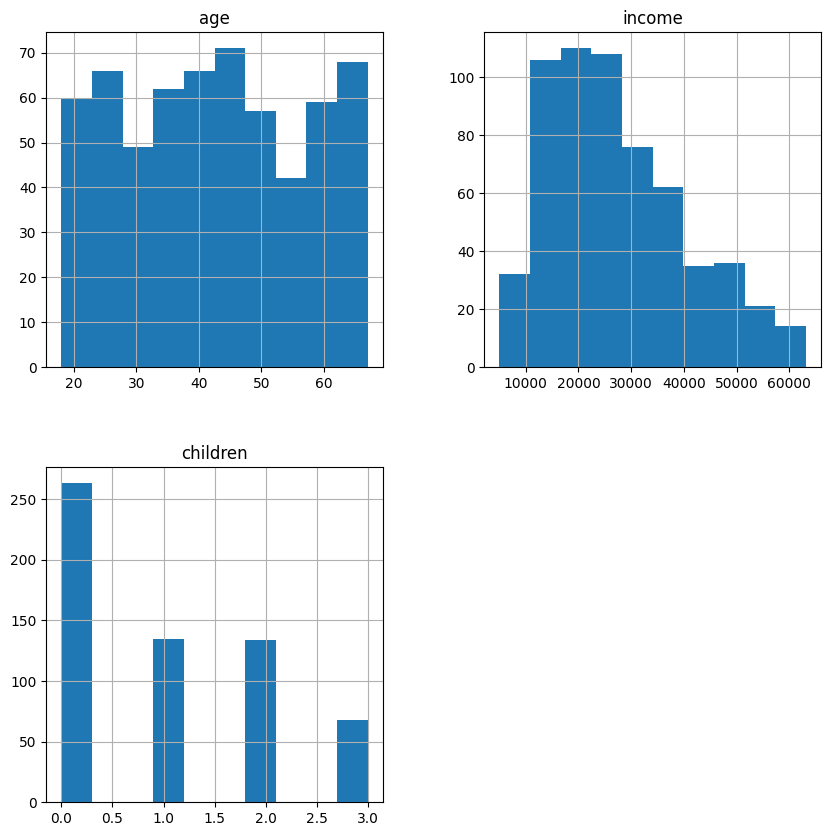

In [4]:
print(df.describe())

print("\n Histogram")
df.hist(figsize=(10,10))
plt.show()

Normalize data

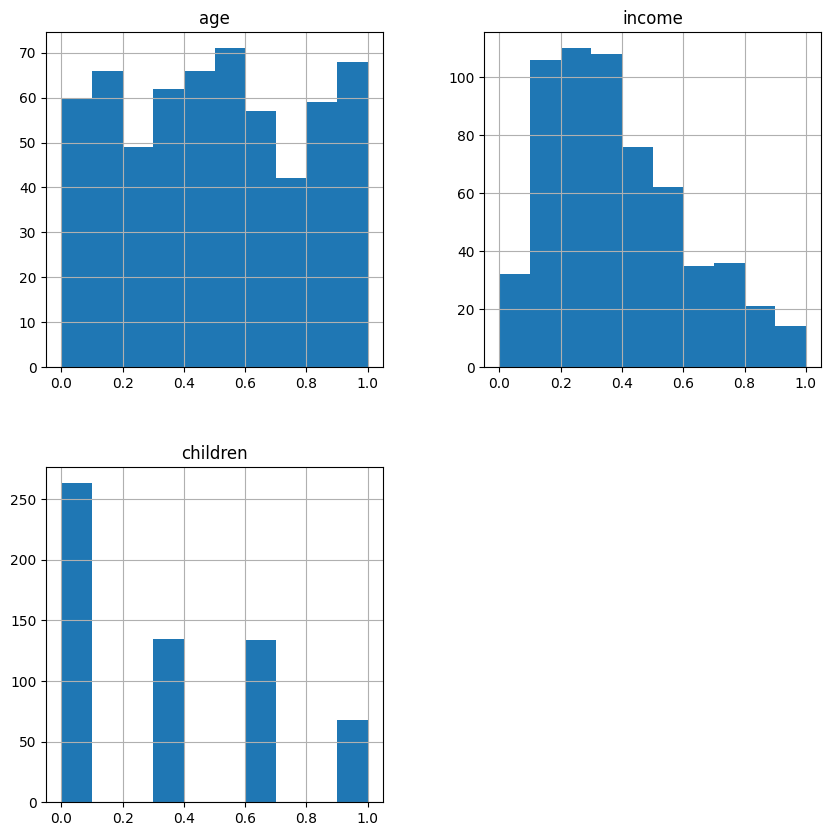

In [5]:
column_to_normalize = ['age', 'income', 'children']
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[column_to_normalize] = scaler.fit_transform(df[column_to_normalize])
df_normalized.hist(figsize=(10, 10))
plt.show()

Relationship and Pattern

               age    income  children
age       1.000000  0.752726  0.023572
income    0.752726  1.000000  0.036761
children  0.023572  0.036761  1.000000


C:\Users\Tonkhaow\AppData\Local\Temp\ipykernel_12768\449654870.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

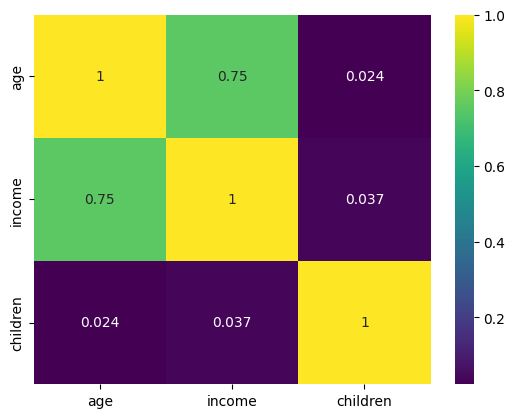

In [6]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

handle missing values

In [7]:
print(df.isnull().sum())

id             0
age            0
sex            0
region         0
income         0
married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
pep            0
dtype: int64


print unique values

In [8]:
print(df.nunique())

id             600
age             50
sex              2
region           4
income         599
married          2
children         4
car              2
save_act         2
current_act      2
mortgage         2
pep              2
dtype: int64


convert boolean data into 1 and 0

In [9]:
df.replace({"NO" : 0, "YES" : 1}, inplace = True)
df.replace({"FEMALE" : 0, "MALE": 1}, inplace = True)
df.replace({"INNER_CITY": 0, "TOWN": 1, "RURAL": 2, "SUBURBAN": 3}, inplace = True)
print(df)

          id  age  sex  region    income  married  children  car  save_act  \
0    ID12101   48    0       0  17546.00        0         1    0         0   
1    ID12102   40    1       1  30085.10        1         3    1         0   
2    ID12103   51    0       0  16575.40        1         0    1         1   
3    ID12104   23    0       1  20375.40        1         3    0         0   
4    ID12105   57    0       2  50576.30        1         0    0         1   
..       ...  ...  ...     ...       ...      ...       ...  ...       ...   
595  ID12696   61    0       0  47025.00        0         2    1         1   
596  ID12697   30    0       0   9672.25        1         0    1         1   
597  ID12698   31    0       1  15976.30        1         0    1         1   
598  ID12699   29    1       0  14711.80        1         0    0         1   
599  ID12700   38    1       1  26671.60        0         0    1         0   

     current_act  mortgage  pep  
0              0         0   

## Classification Models

### Decision Tree

Decision Tree (entropy and gini)

In [10]:
#split data into features and target variables
features_cols = ["age", "sex", "region", "income", "married", "children", "car", "save_act", "mortgage"]
X = df[features_cols] # Features
y = df.pep # Target Variables

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) # 70% training, 30% test

# Create Decision tree classifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8444444444444444


Visualize

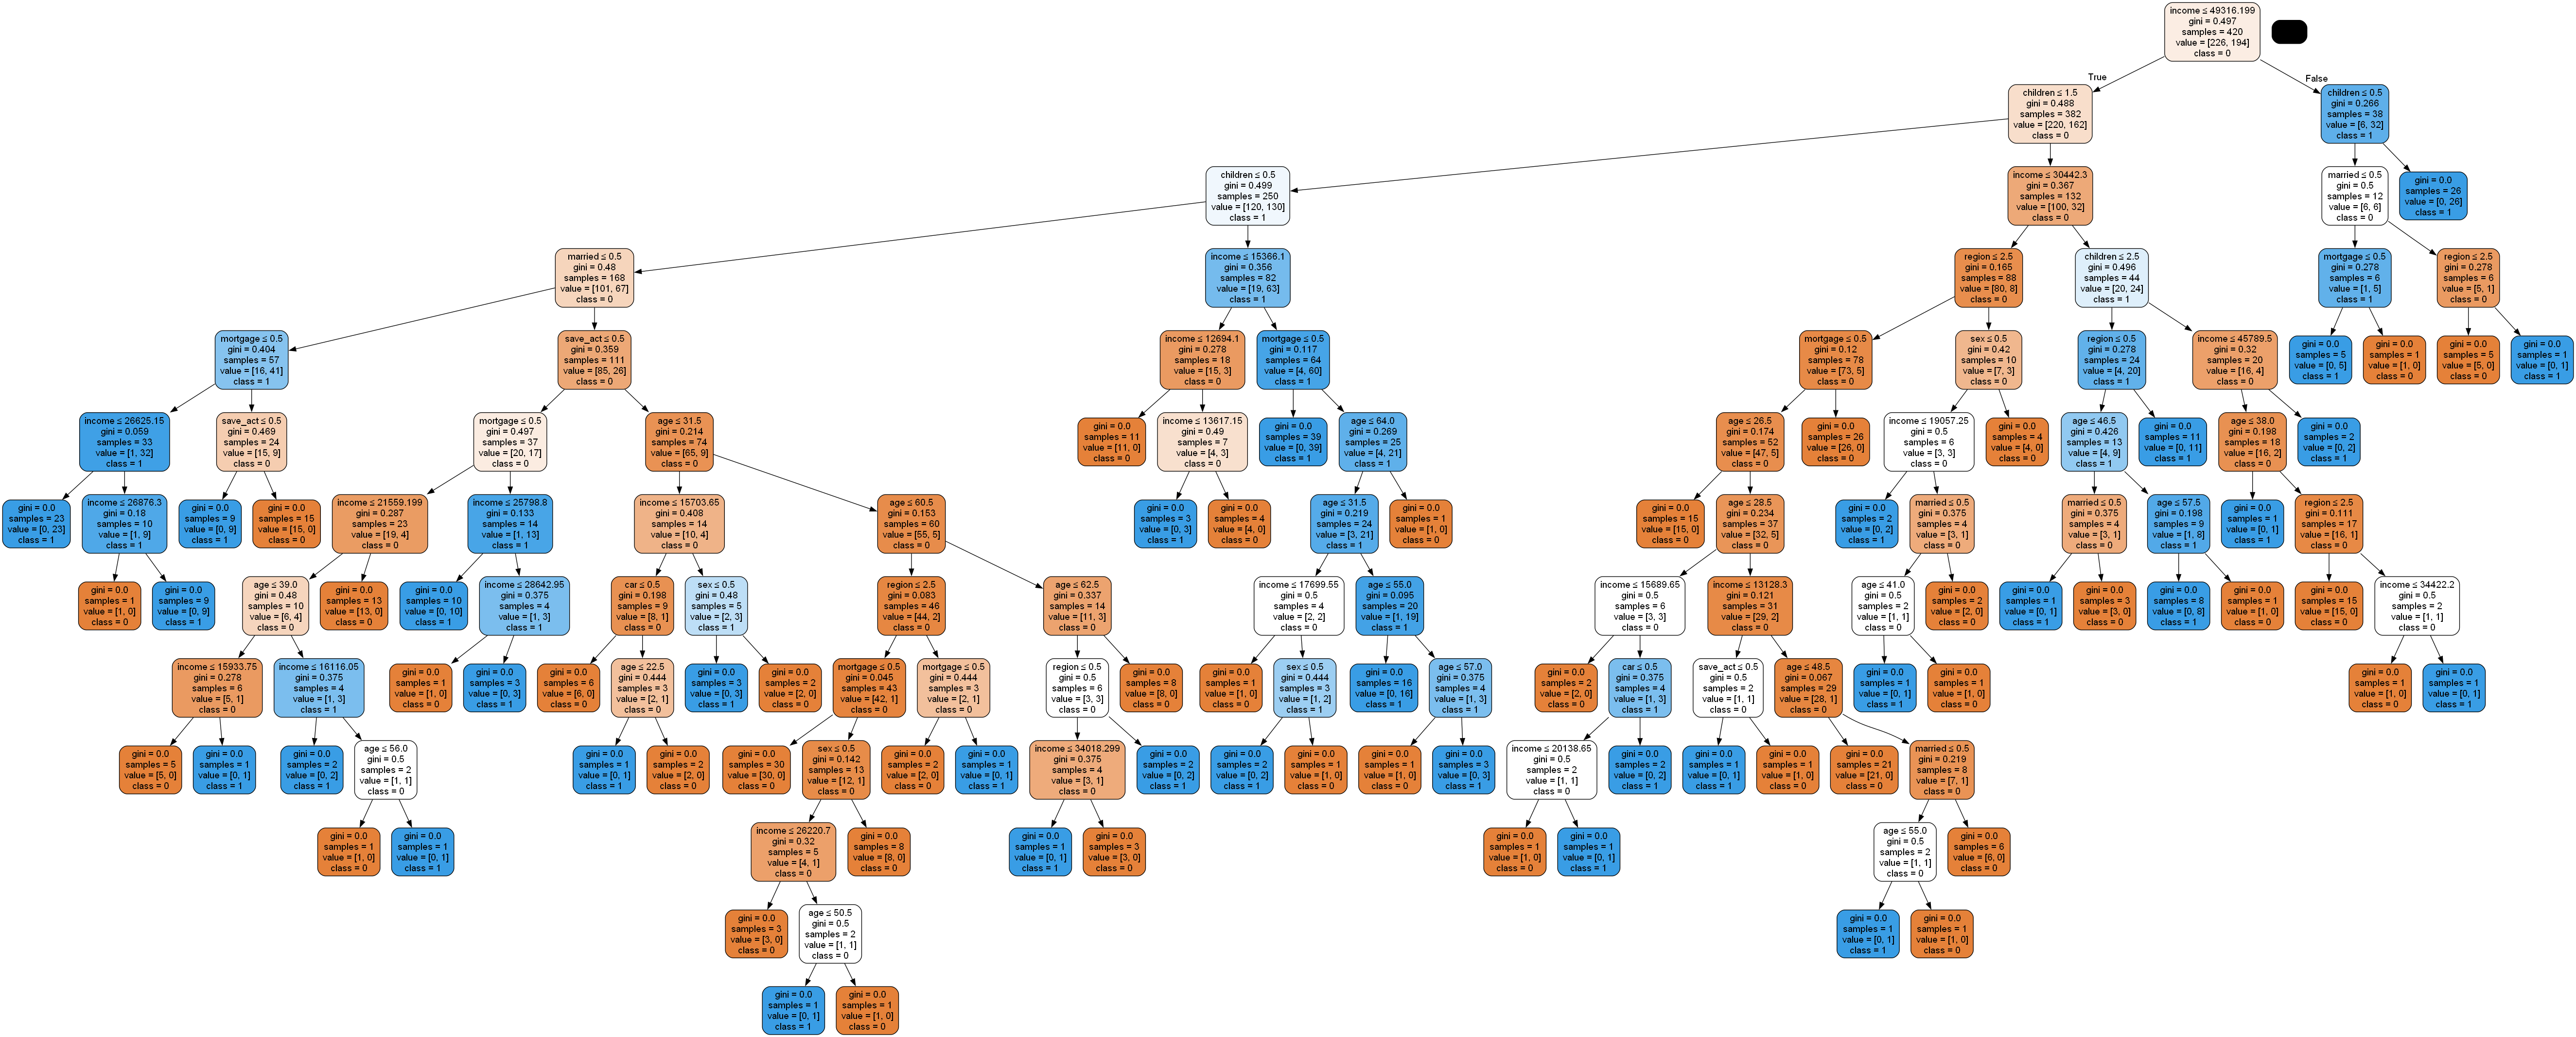

In [11]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled = True, rounded = True, special_characters= True, feature_names= features_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("bank.png")
Image(graph.create_png())

Since the above decision tree is not easy to understand, lets simplify it

In [12]:
# Create Decision Tree Classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))


Accuracy:  0.8


Visualize

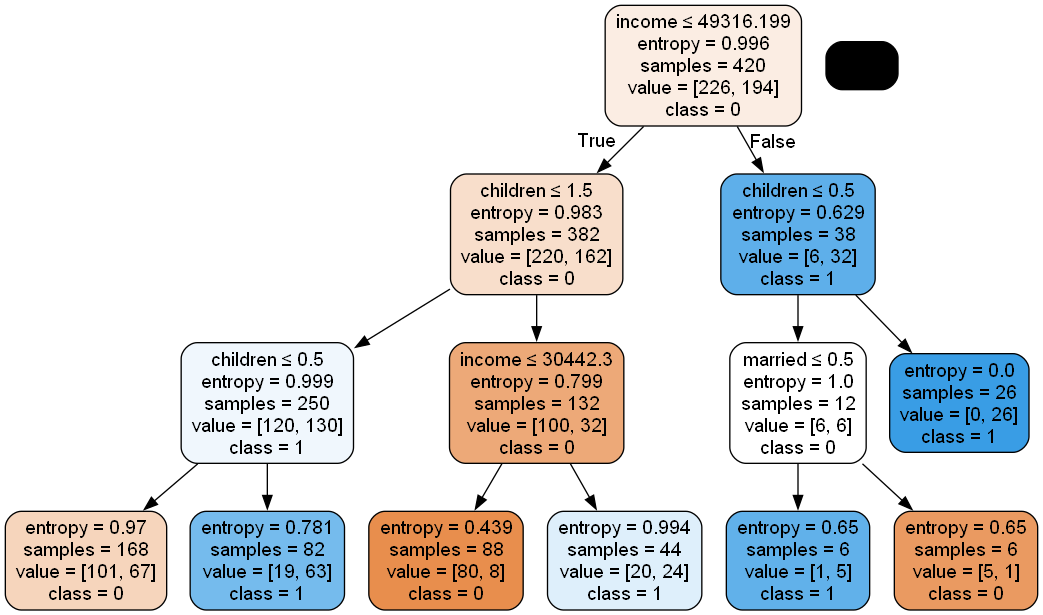

In [13]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled = True, rounded = True, special_characters= True, feature_names= features_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("bank_entropy.png")
Image(graph.create_png())

Gini Method: You measure how often you are wrong when classifing the dataset

Entropy Method: You measure how much data is needed to correctly classify the dataset

0 means same class, 1 means total mix

What I discovered:

The more layer, the more accurate the data will be (10 is the most accurate 89.999%)

Both method offers the same accuracy, just different approach

### KNN (K Nearest Neighbor)

In [14]:
features_cols = ["age", "sex", "region", "income", "married", "children", "car", "save_act", "mortgage"]
X = df[features_cols] # Features
y = df.pep # Target Variables

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) # 70% training, 30% test

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train the model & Predict

In [15]:
# Fitting and Evaluating Model
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7444444444444445


Since we want to know what is the best N value for the best accuracy, we need to use cross validation to get the best value of K

Text(0, 0.5, 'Accuracy Score')

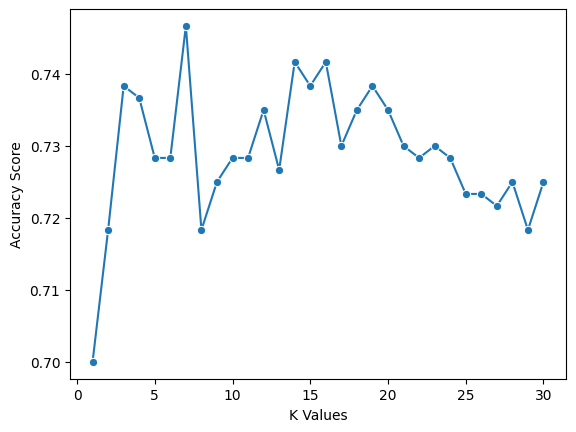

In [16]:
k_values = [i for i in range(1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

From the graph, 7 is the best K value

In [17]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

Accuracy:  0.7277777777777777
Precision:  0.7384615384615385
Recall:  0.6


What I discovered:

You need to iterate through K value to get the best accuracy

### Naive Bays

Create Naive Bays model

In [18]:
features_cols = ["age", "sex", "region", "income", "married", "children", "car", "save_act", "mortgage"]
X = df[features_cols] # Features
y = df.pep # Target Variables

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 125
)

model = GaussianNB()

model.fit(X_train, y_train);

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average = "weighted")

print("Accuracy: ", accuray)
print("F1 Score: ", f1) # The performance of the model using recall (sensitivity of the model) & precision (1 means good, 0 means bad)

Accuracy:  0.6464646464646465
F1 Score:  0.6529834754035906


Visualize the model

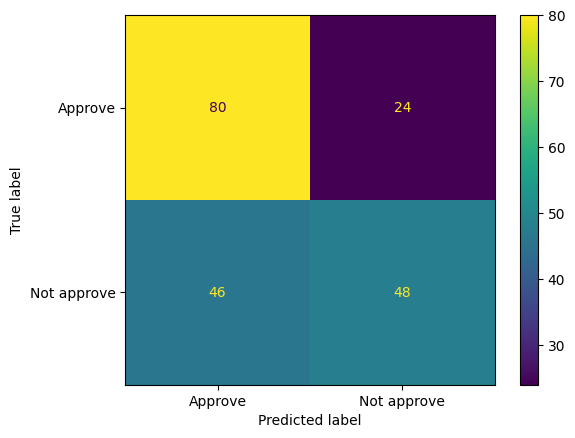

In [19]:
labels = ["Approve", "Not approve"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

### Logistic Regression

In [20]:
features_cols = ["age", "sex", "region", "income", "married", "children", "car", "save_act", "mortgage"]
X = df[features_cols] # Features
y = df.pep # Target Variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 16)

# Instantiate the model (using default parameter)
logreg = LogisticRegression(random_state = 16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

evaluate the model

In [21]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[53, 23],
       [46, 28]], dtype=int64)

visualize using heatmap

Text(0.5, 427.9555555555555, 'Predicted Label')

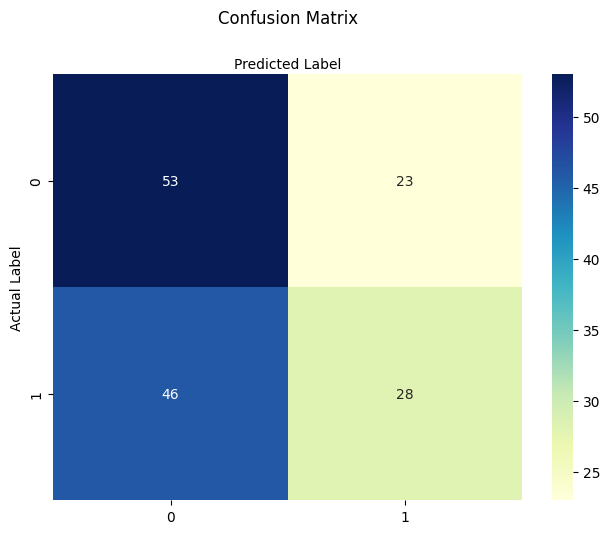

In [22]:
class_names = [0, 1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y = 1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

ROC Curve

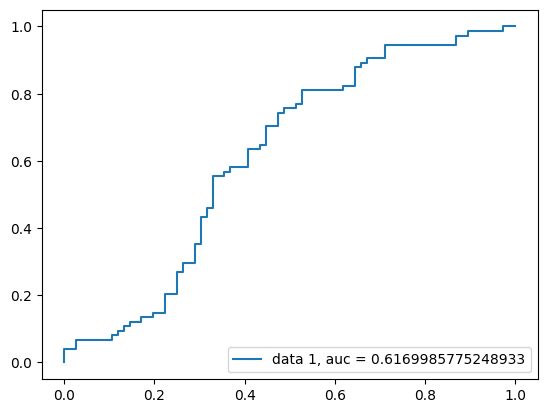

In [23]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)
plt.show()

## Summary

What I have learnt:

There are 4 types of classification

1. Decision tree
- Decision tree are made with nodes and leaf
- each node will have a condition which if the data fits, then it goes down the node
- the classification is called class
- you can control the level (depth) of the tree, the more level, the more accuracy
- 2 methods of classification, Gini & Entropy
    - Gini index: number which describe how wrong data is classified randomly
    - Entropy: number which describe whether the condition is enough for the data to be classified

2. KNN (K nearest neighbor)
- a classification method which classify which point is near which
- uses K to iterate through the process
- You need to iterate through K and graph it in order to get the best accuracy

3. Naive Bay
- Uses bay theoreom to classify the values
- bay theoreom is to calculate the propability that a data belongs to a class
- we use confusion matrix to visualize how well the model is
- confusion matrix is a matrix which shows the predicted value with the actual value

4. Logistic Regression
- a technique which predicts a binary value
- we use ROC to measure the performance of the regression
- ROC Curve shows the change if TPR and FPR when you adjust the threshold

